# Lab 7: Content Based Recommendation System

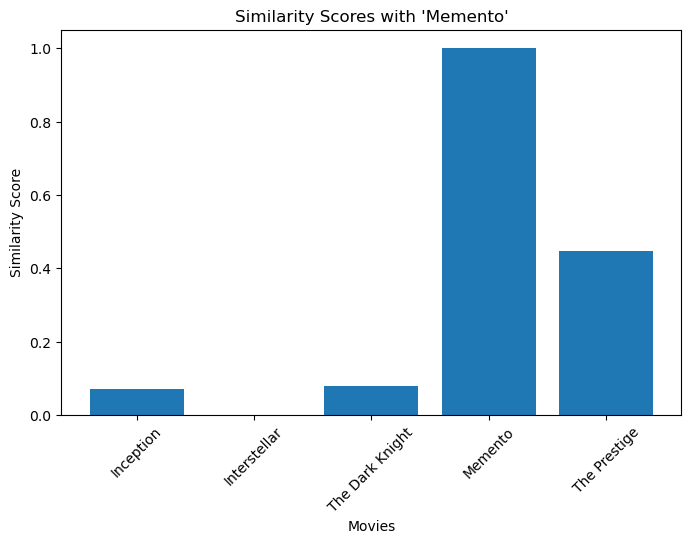

Recommended movies for: Memento
             Movie                                       Description
4     The Prestige  magicians rivalry mystery psychological thriller
2  The Dark Knight              vigilante hero action crime thriller
0        Inception      dreams mind-bending science-fiction thriller
1     Interstellar   space travel black holes emotional sci-fi drama


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

data = {
    "Movie": ["Inception", "Interstellar", "The Dark Knight", "Memento", "The Prestige"],
    "Description": [
        "dreams mind-bending science-fiction thriller",
        "space travel black holes emotional sci-fi drama",
        "vigilante hero action crime thriller",
        "memory loss psychological thriller mystery",
        "magicians rivalry mystery psychological thriller"
    ]
}

df = pd.DataFrame(data)

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df["Description"])
similarity_matrix = cosine_similarity(tfidf_matrix)

target_index = 3
scores = similarity_matrix[target_index]

plt.figure(figsize=(8,5))
plt.bar(df["Movie"], scores)
plt.title("Similarity Scores with 'Memento'")
plt.xlabel("Movies")
plt.ylabel("Similarity Score")
plt.xticks(rotation=45)
plt.show()

print("Recommended movies for:", df["Movie"][target_index])
recommendations = df.iloc[scores.argsort()[::-1][1:]]
print(recommendations)


# Lab 8: Item Based Collaborative Filtering

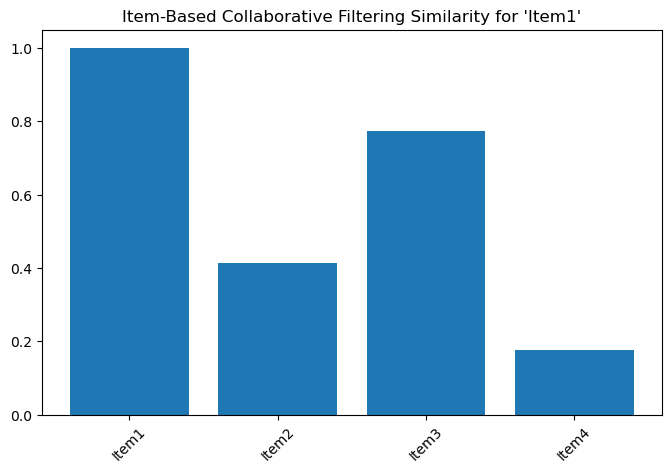

Similarity matrix:
           Item1     Item2     Item3     Item4
Item1  1.000000  0.415227  0.775170  0.177778
Item2  0.415227  1.000000  0.445669  0.775091
Item3  0.775170  0.445669  1.000000  0.000000
Item4  0.177778  0.775091  0.000000  1.000000

Recommendations for: Item1
Item3    0.775170
Item2    0.415227
Item4    0.177778
Name: Item1, dtype: float64


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
data = {
    "User": ["U1","U2","U3","U4","U5"],
    "Item1": [5,4,0,2,0],
    "Item2": [3,0,4,0,2],
    "Item3": [4,0,0,3,0],
    "Item4": [0,2,5,0,4]
}
df = pd.DataFrame(data).set_index("User")
item_item_similarity = pd.DataFrame(
    cosine_similarity(df.T),
    index=df.columns,
    columns=df.columns
)
target_item = "Item1"
scores = item_item_similarity[target_item]
plt.figure(figsize=(8,5))
plt.bar(item_item_similarity.columns, scores)
plt.title(f"Item-Based Collaborative Filtering Similarity for '{target_item}'")
plt.xticks(rotation=45)
plt.show()
print("Similarity matrix:\n", item_item_similarity)
print("\nRecommendations for:", target_item)
print(scores.sort_values(ascending=False)[1:])


# Lab 9: Model Based Collaborative Filtering

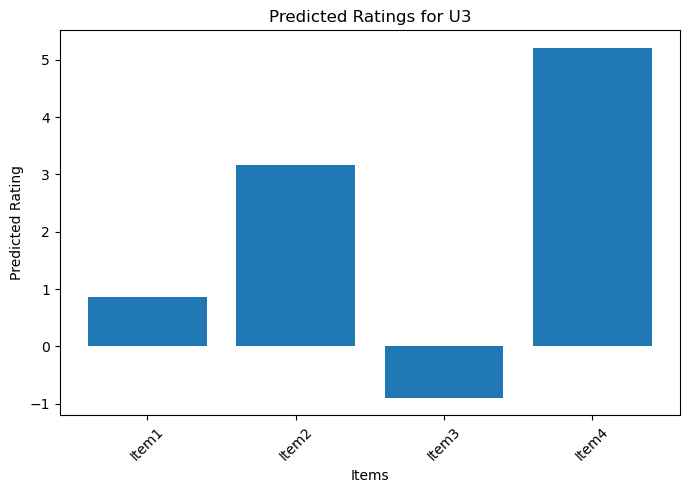

Predicted Ratings Matrix:
          Item1     Item2     Item3     Item4
User                                        
U1    5.515883  1.863160  3.721714  0.555217
U2    2.584997  1.576620  1.379781  1.517933
U3    0.868854  3.158753 -0.897951  5.210363
U4    2.595271  0.430806  1.982034 -0.535874
U5    2.373175  2.761841  0.585860  3.743631

Recommended Items for U3 :
 Item4    5.210363
Item2    3.158753
Item1    0.868854
Item3   -0.897951
Name: U3, dtype: float64


In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
data = {
    "User": ["U1","U2","U3","U4","U5"],
    "Item1": [5,4,0,2,3],
    "Item2": [3,0,4,0,2],
    "Item3": [4,0,0,3,0],
    "Item4": [0,2,5,0,4]
}
df = pd.DataFrame(data).set_index("User")
svd = TruncatedSVD(n_components=2)
latent_user = svd.fit_transform(df)
latent_items = svd.components_
pred = np.dot(latent_user, latent_items)
pred_df = pd.DataFrame(pred, index=df.index, columns=df.columns)
target_user = "U3"
u_values = pred_df.loc[target_user]
plt.figure(figsize=(8,5))
plt.bar(u_values.index, u_values.values)
plt.title(f"Predicted Ratings for {target_user}")
plt.xlabel("Items")
plt.ylabel("Predicted Rating")
plt.xticks(rotation=45)
plt.show()
print("Predicted Ratings Matrix:\n", pred_df)
print("\nRecommended Items for", target_user, ":\n", u_values.sort_values(ascending=False))


# Lab 10: User Based Recommendation System

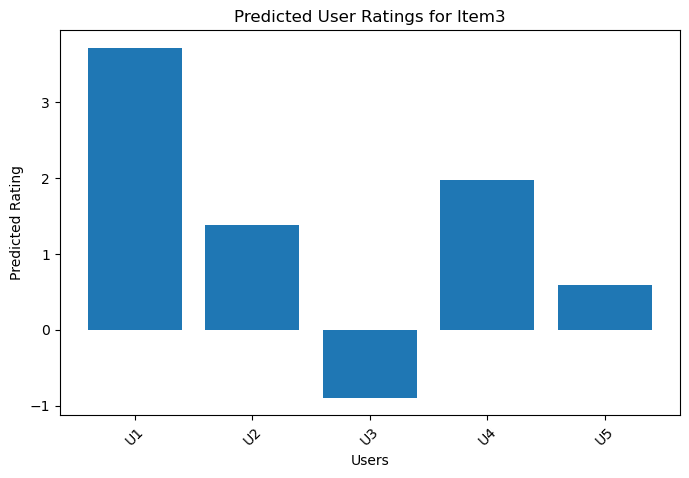

Predicted Ratings Matrix:
          Item1     Item2     Item3     Item4
User                                        
U1    5.515883  1.863160  3.721714  0.555217
U2    2.584997  1.576620  1.379781  1.517933
U3    0.868854  3.158753 -0.897951  5.210363
U4    2.595271  0.430806  1.982034 -0.535874
U5    2.373175  2.761841  0.585860  3.743631

Top User Predictions for Item3 :
 User
U1    3.721714
U4    1.982034
U2    1.379781
U5    0.585860
U3   -0.897951
Name: Item3, dtype: float64


In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
data = {
    "User": ["U1","U2","U3","U4","U5"],
    "Item1": [5,4,0,2,3],
    "Item2": [3,0,4,0,2],
    "Item3": [4,0,0,3,0],
    "Item4": [0,2,5,0,4]
}
df = pd.DataFrame(data).set_index("User")
svd = TruncatedSVD(n_components=2)
latent_user = svd.fit_transform(df)
latent_item = svd.components_
pred = np.dot(latent_user, latent_item)
pred_df = pd.DataFrame(pred, index=df.index, columns=df.columns)
target_item = "Item3"
u_values = pred_df[target_item]
plt.figure(figsize=(8,5))
plt.bar(u_values.index, u_values.values)
plt.title(f"Predicted User Ratings for {target_item}")
plt.xlabel("Users")
plt.ylabel("Predicted Rating")
plt.xticks(rotation=45)
plt.show()
print("Predicted Ratings Matrix:\n", pred_df)
print("\nTop User Predictions for", target_item, ":\n", u_values.sort_values(ascending=False))
